In [ ]:
import os
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# os.chdir('drive/MyDrive')

In [ ]:
# trainDir = 'Deep-Learning-Face-Recognition/Database/Train/Mukesh'

In [ ]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

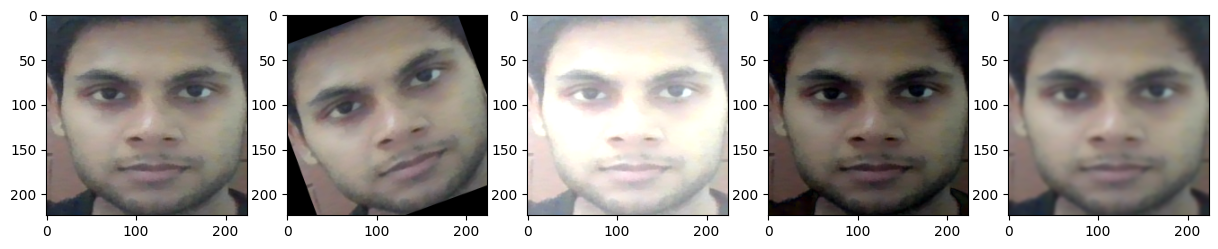

In [ ]:
# for images in os.listdir(trainDir):
#   img_path = os.path.join(trainDir, images)

#   img = cv2.imread(img_path)
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#   plt.imshow(img)
#   plt.show()

img_path = os.path.join(trainDir, '1.jpg')
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rotate = rotate_image(img, 20)
img_bright = cv2.convertScaleAbs(img, alpha = 1, beta = 100)
img_dim = cv2.convertScaleAbs(img, alpha = 1, beta = -50)
img_blur = cv2.GaussianBlur(img, (125,125), 1.5)
# Displaying some read images
plt.figure(figsize = (15, 15))

plt.subplot(1, 5, 1)
plt.imshow(img)
plt.subplot(1, 5, 2)
plt.imshow(img_rotate)
plt.subplot(1, 5, 3)
plt.imshow(img_bright)
plt.subplot(1, 5, 4)
plt.imshow(img_dim)
plt.subplot(1, 5, 5)
plt.imshow(img_blur)

plt.show()

In [ ]:
# Practice code is working fine, maybe this will be the final code

source_path = 'Deep-Learning-Face-Recognition/Database/Train'

X = [] #images
Y = [] # corresponding labels

for folders in os.listdir(source_path):
  sub_path = os.path.join(source_path, folders)
  cnt = 1
  angle = -20
  brightIncr = 80
  brightDecr = -50
  for images in os.listdir(sub_path):
    imagePath = os.path.join(sub_path, images)

    try :
      image = cv2.imread(imagePath)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image, (224, 224))

      if(cnt <= 20): #brighten, dim, blur
        img_rotate = np.array(rotate_image(image, angle))
        X.append(img_rotate)
        Y.append(folders)
        angle += 1
        img_bright = np.array(cv2.convertScaleAbs(image, alpha = 1, beta = brightIncr))
        brightIncr += 1
        img_dim = np.array(cv2.convertScaleAbs(image, alpha = 1, beta = brightDecr))
        brightDecr -= 1
        img_blur = np.array(cv2.GaussianBlur(image, (125,125), 1.5))
        X.append(img_bright)
        X.append(img_dim)
        X.append(img_blur)
        Y.append(folders)
        Y.append(folders)
        Y.append(folders)
        cnt += 1
      else :
        # converting to the array
        imageArr = np.array(image)

        # image = image.reshape([224, 224, 3]) # it's not needed
        X.append(imageArr)
        Y.append(folders)
    except :
      print(f"An exception occured at the image :{imagePath} ")


In [ ]:
print(len(X))
print(len(Y))

1040
1040


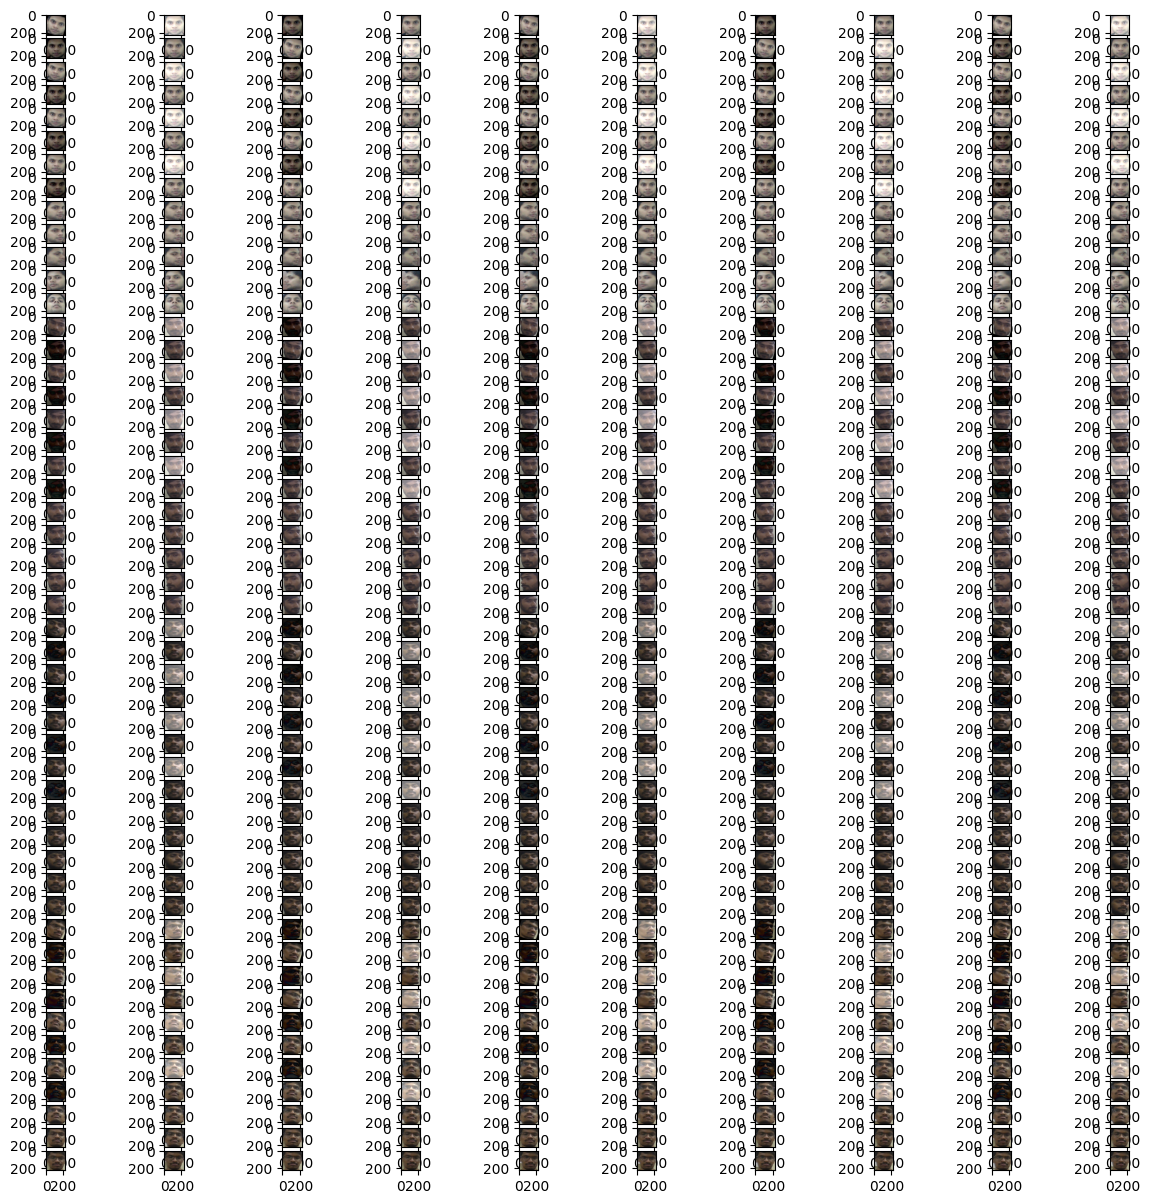

In [ ]:
cnt = 1
plt.figure(figsize = (15, 15))
for i in range(len(X)):
  plt.subplot(50, 10, i+1)
  curr_img = np.reshape(X[i], (224, 224, 3))
  plt.imshow(curr_img)
  cnt += 1
  if(cnt > 500):
    break
plt.show()

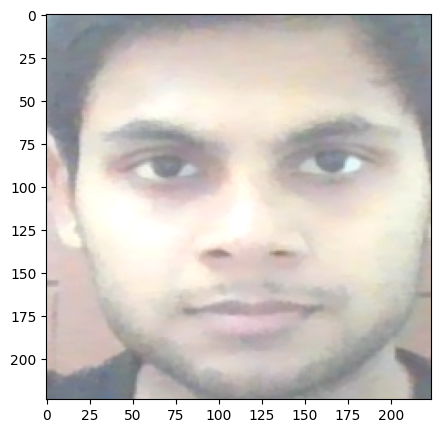

In [ ]:
plt.figure(figsize = (5, 5))

curr_img = np.reshape(X[1], (224, 224, 3))
plt.imshow(curr_img)
plt.show()

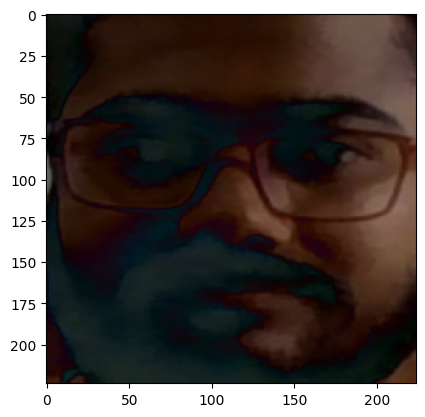

In [ ]:
path = "Deep-Learning-Face-Recognition/Database/Train/Vignesh/8.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = cv2.resize(image, (224, 224))
img = np.array(cv2.convertScaleAbs(img, alpha = 1, beta = -70))

plt.imshow(img)

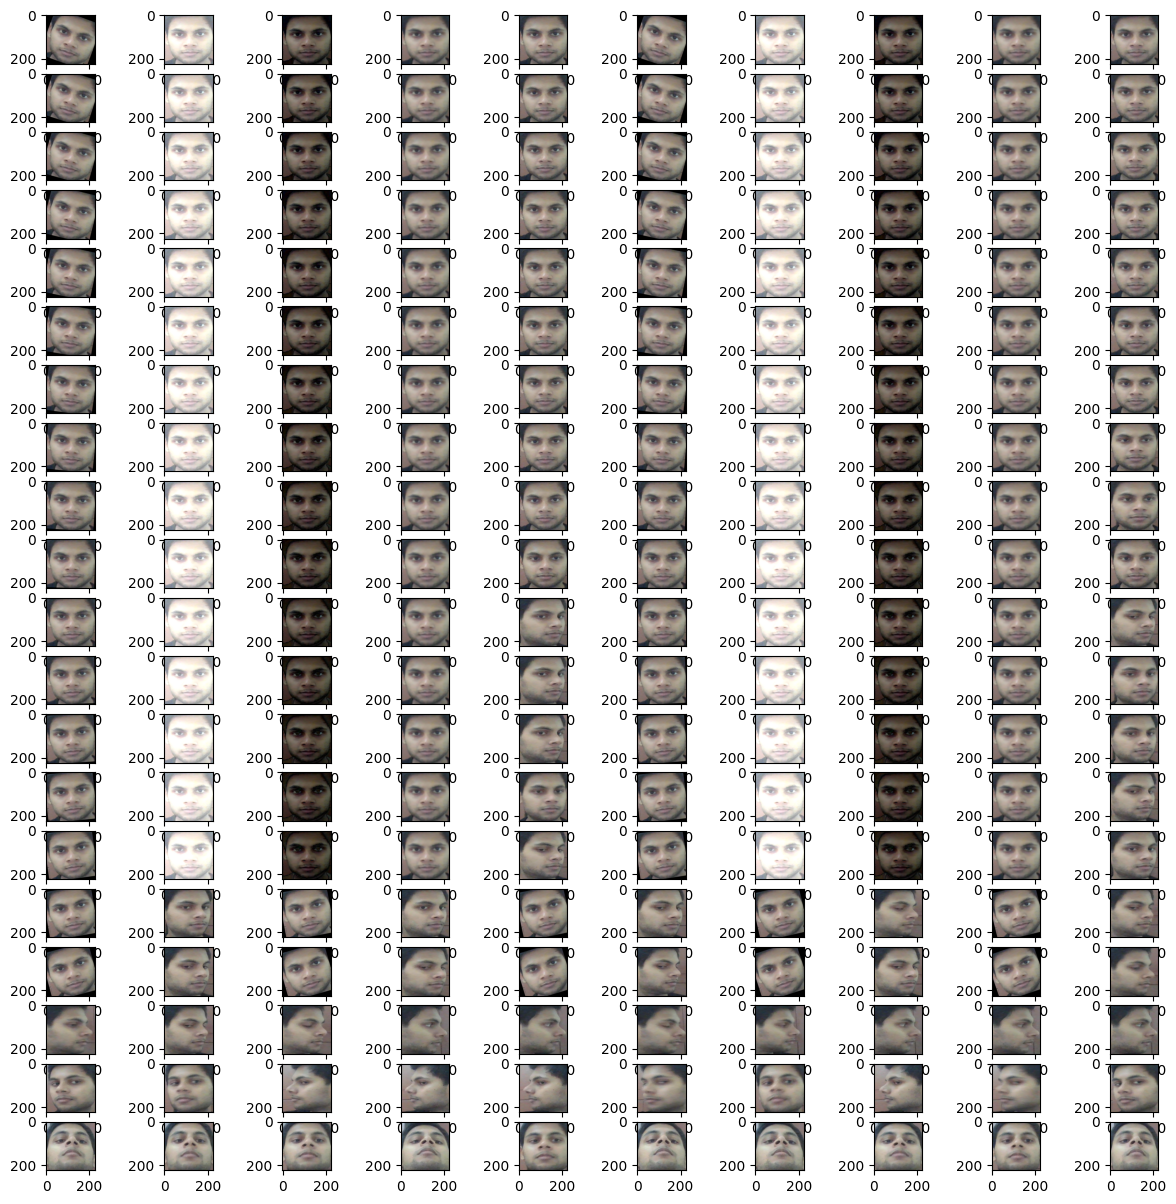

In [ ]:
# plt.figure(figsize = (15, 15))
# for i in range(len(X)):
#   plt.subplot(20, 10, i+1)
#   curr_img = np.reshape(X[i], (224, 224, 3))
#   plt.imshow(curr_img)
# plt.show()

In [ ]:
# Normalizing the images
images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr = images_arr/np.max(images_arr)


In [ ]:
# Old dataset
# Main code can use that in future

# source_path = 'Database/Train'

# X = [] #images
# Y = [] # corresponding labels

# for folders in os.listdir(source_path):
#   sub_path = os.path.join(source_path, folders)
#   cnt = 0
#   for images in os.listdir(sub_path):
#     imagePath = os.path.join(sub_path, images)

#     image = Image.open(imagePath)
#     image = image.convert("RGB")
#     image = image.resize((224, 224))
#     # converting to the array
#     imageArr = np.array(image)

#     # image = image.reshape([224, 224, 3]) # it's not needed
#     X.append(imageArr)
#     Y.append(folders)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinarizer = LabelBinarizer()
y = labelBinarizer.fit_transform(Y)

In [ ]:
print(len(X))

1040


In [ ]:
# Everything old
# images_arr2 = np.asarray(X)
# images_arr2 = images_arr.astype('float32')
# images_arr2 = images_arr/np.max(images_arr2)

# y2 = labelBinarizer.fit_transform(Y)

In [ ]:
# len(X)
# X[0].shape
# print(len(images_arr2))

1800


In [ ]:
from keras.applications.vgg16 import VGG16
from skimage.transform import resize

model = VGG16(weights = 'imagenet', include_top = False)

X = []

for i in range(images_arr.shape[0]):
  img = resize(images_arr[i], (224, 224, 3), anti_aliasing = True)
  features = model.predict(np.array([img]))
  flist = np.array(features.flatten())
  X.append(flist)

1/1 [==============================] - 0s 16ms/step


In [ ]:
X = np.array(X)
print(X)
print(len(X))

[[0.38295525 0.         0.         ... 0.         0.7870041  0.        ]
 [0.31208652 0.         0.         ... 0.         0.734884   0.        ]
 [0.07216772 0.         0.         ... 0.03535102 0.8035497  0.        ]
 ...
 [0.04108523 0.         0.         ... 0.         0.7901285  0.        ]
 [0.16658704 0.         0.         ... 0.         0.8137661  0.        ]
 [0.17856899 0.         0.         ... 0.         0.8221013  0.        ]]
1040


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42, stratify = y)

1440

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, LeakyReLU, Dropout
import random
import tensorflow as tf

In [ ]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

no_of_classes = 8

dnnModel = Sequential()
dnnModel.add(Dense(1024, activation = "swish", input_shape = (25088,)))
dnnModel.add(Dense(512, activation = "swish"))
dnnModel.add(Dense(256, activation = "swish"))
dnnModel.add(Dropout(0.5))
dnnModel.add(Dense(128, activation = "swish"))
dnnModel.add(Dense(64, activation = "swish"))
dnnModel.add(Dropout(0.5))
dnnModel.add(Dense(32, activation = "swish"))
dnnModel.add(Dense(no_of_classes, activation = 'sigmoid'))
dnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [ ]:
dnnModel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
dnnModel.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose = 2, validation_split = 0.2)

Epoch 1/50
21/21 - 9s - loss: 1.9826 - accuracy: 0.3008 - val_loss: 1.0205 - val_accuracy: 0.6287 - 9s/epoch - 438ms/step
Epoch 2/50
21/21 - 0s - loss: 0.6559 - accuracy: 0.7820 - val_loss: 0.0647 - val_accuracy: 0.9940 - 294ms/epoch - 14ms/step
Epoch 3/50
21/21 - 0s - loss: 0.1275 - accuracy: 0.9654 - val_loss: 0.0554 - val_accuracy: 0.9820 - 264ms/epoch - 13ms/step
Epoch 4/50
21/21 - 0s - loss: 0.0624 - accuracy: 0.9789 - val_loss: 0.0031 - val_accuracy: 1.0000 - 270ms/epoch - 13ms/step
Epoch 5/50
21/21 - 0s - loss: 0.0318 - accuracy: 0.9895 - val_loss: 4.6986e-04 - val_accuracy: 1.0000 - 264ms/epoch - 13ms/step
Epoch 6/50
21/21 - 0s - loss: 0.0212 - accuracy: 0.9925 - val_loss: 0.0022 - val_accuracy: 1.0000 - 297ms/epoch - 14ms/step
Epoch 7/50
21/21 - 0s - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0200 - val_accuracy: 0.9940 - 266ms/epoch - 13ms/step
Epoch 8/50
21/21 - 0s - loss: 0.0125 - accuracy: 0.9955 - val_loss: 0.0122 - val_accuracy: 0.9940 - 264ms/epoch - 13ms/step
Epoch 

In [ ]:
testLoss, testAccuracy = dnnModel.evaluate(X_test, y_test)
print("Test accuracy = ", testAccuracy)

7/7 [==============================] - 0s 5ms/step - loss: 3.2668e-08 - accuracy: 1.0000
Test accuracy =  1.0


In [ ]:
# Checking the prediction
# os.listdir('Database/Test/Mukesh')
path = 'Deep-Learning-Face-Recognition/Database/Train/Ananthesh'
imgName = "98.jpg"
imgPath = os.path.join(path, imgName)

In [ ]:
image = Image.open(imgPath)
image = image.convert("RGB")
image = image.resize((224, 224))
# converting to the array
imageArr = np.array(image)

X = [imageArr]

images_arr = np.asarray(X)
images_arr = images_arr.astype('float32')
images_arr = images_arr/np.max(images_arr)

features = model.predict(images_arr)

features = features.reshape(-1, 25088)

y = dnnModel.predict(features)

1/1 [==============================] - 0s 105ms/step


In [ ]:
print(y)

[[3.2611635e-01 2.3512550e-09 1.0000000e+00 9.9969196e-01 9.7708911e-01
  1.4390062e-07 3.4934540e-06 9.9973387e-01]]


In [ ]:
res = labelBinarizer.inverse_transform(y)
res

array(['Ananthesh'], dtype='<U9')

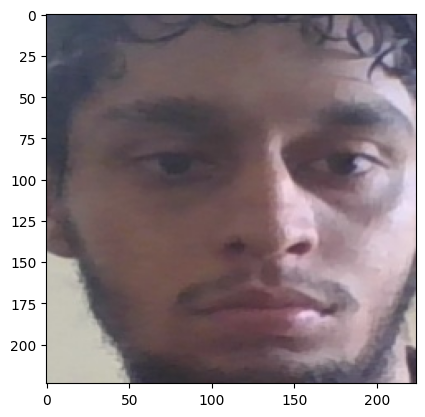

In [ ]:
plt.imshow(image)

In [ ]:
model.save('final_vgg.keras')
dnnModel.save('final_dnn.keras')

In [ ]:
import pickle

# Save the LabelBinarizer to a file
with open('final_label_binarizer.pkl', 'wb') as file:
    pickle.dump(labelBinarizer, file)

In [ ]:
# code to import the label binarizer in the local pc
import pickle

# Load the LabelBinarizer from the file
with open('label_binarizer.pkl', 'rb') as file:
    labelBinarizer = pickle.load(file)